In [1]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Datos de los gases de efecto invernadero Globales (datos de NOAA) 

- <b>Ref</b>: Dr. Pieter Tans, NOAA/GML (gml.noaa.gov/ccgg/trends/) and Dr. Ralph Keeling, Scripps Institution of Oceanography (scrippsco2.ucsd.edu/).

https://gml.noaa.gov/ccgg/trends/data.html

In [2]:
def read_data_annual(file,gas):
    file_path=file
    df=pd.read_csv(file_path)
    df=df.set_index("year")
    df.index = pd.to_datetime(df.index,format='%Y')
    df.rename(columns={"mean": gas},inplace=True)
    return df

def read_data_monthly(file,gas):
    file_path=file
    df=pd.read_csv(file_path)
    df['date'] = pd.to_datetime(df[['year', 'month']].assign(DAY=1))
    df=df.set_index("date")
    df.drop("year",axis=1,inplace=True)
    df.drop("month",axis=1,inplace=True)
    df.drop("decimal",axis=1,inplace=True)
    
    if gas == "CO2":
        df.rename(columns={"average": gas},inplace=True) 
        df.drop("trend",axis=1,inplace=True)
    else:
        df.rename(columns={"average": gas,"average_unc":"unc"},inplace=True) 
        df.drop("trend",axis=1,inplace=True)
        df.drop("trend_unc",axis=1,inplace=True)
    return df

In [3]:
# Leemos los ficheros y modificamos las tablas para crearlas como nosotros queremos
data_CO2_mensual=read_data_monthly("tablas_ini/NOAAdata_CO2_monthly.csv","CO2")
data_CO2_anual=read_data_annual("tablas_ini/NOAAdata_CO2_annual.csv","CO2")

data_N2O_mensual=read_data_monthly("tablas_ini/NOAAdata_N2O_monthly.csv","N2O")
data_N2O_anual=read_data_annual("tablas_ini/NOAAdata_N2O_annual.csv","N2O")

data_CH4_mensual=read_data_monthly("tablas_ini/NOAAdata_CH4_monthly.csv","CH4")
data_CH4_anual=read_data_annual("tablas_ini/NOAAdata_CH4_annual.csv","CH4")

data_SF6_mensual=read_data_monthly("tablas_ini/NOAAdata_SF6_monthly.csv","SF6")
data_SF6_anual=read_data_annual("tablas_ini/NOAAdata_SF6_annual.csv","SF6")

In [4]:
# Unimos todas las tablas
data_anual = pd.concat([data_CO2_anual, data_N2O_anual,data_CH4_anual,data_SF6_anual], axis=1)
data_mensual = pd.concat([data_CO2_mensual, data_N2O_mensual,data_CH4_mensual,data_SF6_mensual], axis=1)


In [9]:
data_mensual

,CO2,N2O,unc,CH4,unc,SF6,unc
date,,,,,,,
1980-01-01,338.55,NaN,NaN,NaN,NaN,NaN,NaN
1980-02-01,339.27,NaN,NaN,NaN,NaN,NaN,NaN
1980-03-01,339.60,NaN,NaN,NaN,NaN,NaN,NaN
1980-04-01,339.99,NaN,NaN,NaN,NaN,NaN,NaN
1980-05-01,340.43,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2021-06-01,415.25,334.2,-9.9,1888.6,-9.9,10.62,-9.9
2021-07-01,413.48,334.2,-9.9,1886.7,-9.9,10.64,-9.9
2021-08-01,412.11,334.3,-9.9,1893.1,-9.9,10.66,-9.9


In [5]:
data_anual.describe()

,CO2,unc,N2O,unc,CH4,unc,SF6,unc
count,41.000000,4.100000e+01,20.000000,20.000000,37.000000,37.000000,23.000000,23.000000
mean,371.525854,1.000000e-01,324.013500,0.126000,1769.115676,0.599459,6.923478,0.003522
std,21.880138,1.405019e-17,5.273355,0.013139,57.565462,0.089503,1.896033,0.001039
min,338.910000,1.000000e-01,316.360000,0.100000,1644.680000,0.420000,4.210000,0.002000
25%,354.050000,1.000000e-01,319.592500,0.120000,1736.490000,0.540000,5.340000,0.003000
50%,368.960000,1.000000e-01,323.700000,0.125000,1773.360000,0.580000,6.750000,0.004000
75%,388.760000,1.000000e-01,328.365000,0.140000,1803.110000,0.660000,8.415000,0.004000
max,412.440000,1.000000e-01,333.030000,0.150000,1879.100000,0.810000,10.270000,0.006000


In [6]:
data_mensual.describe()

,CO2,N2O,unc,CH4,unc,SF6,unc
count,502.000000,249.000000,249.000000,459.000000,459.000000,291.000000,291.000000
mean,372.381733,324.388755,-0.196386,1769.844880,0.856209,6.978522,-0.266440
std,22.281381,5.407204,1.772035,60.633767,1.456974,1.964954,1.622506
min,337.050000,316.100000,-9.900000,1625.900000,-9.900000,4.000000,-9.900000
25%,354.000000,319.700000,0.100000,1736.650000,0.900000,5.245000,0.005000
50%,369.680000,324.100000,0.100000,1774.600000,1.000000,6.770000,0.006000
75%,390.265000,328.900000,0.100000,1807.150000,1.100000,8.615000,0.006000
max,416.080000,334.400000,0.200000,1900.500000,2.900000,10.690000,0.013000


array([[<AxesSubplot:title={'center':'CO2'}>,
        <AxesSubplot:title={'center':'N2O'}>],
       [<AxesSubplot:title={'center':'CH4'}>,
        <AxesSubplot:title={'center':'SF6'}>]], dtype=object)

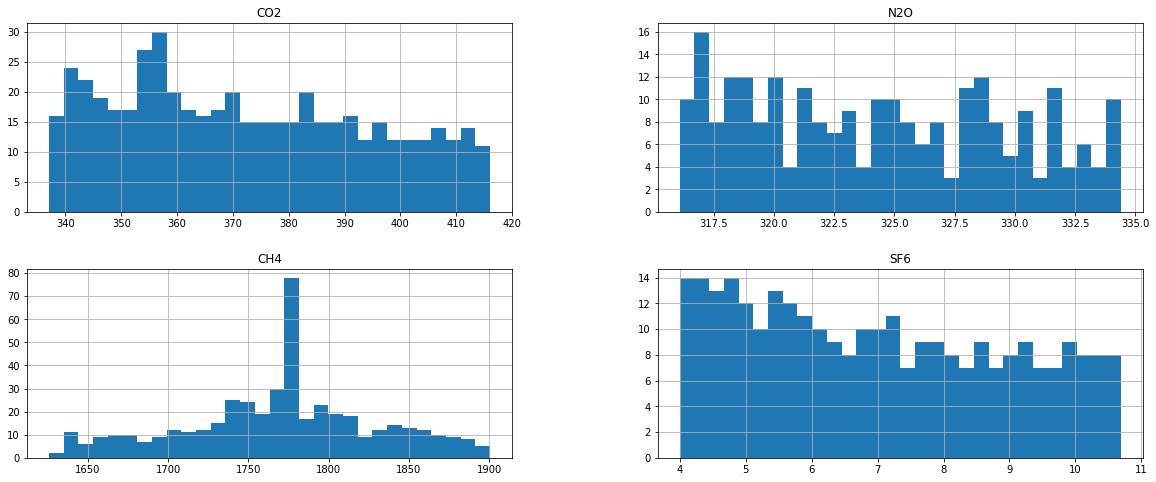

In [7]:
data_mensual.hist(column=["CO2","N2O","CH4","SF6"],bins=30, figsize=(20, 8))

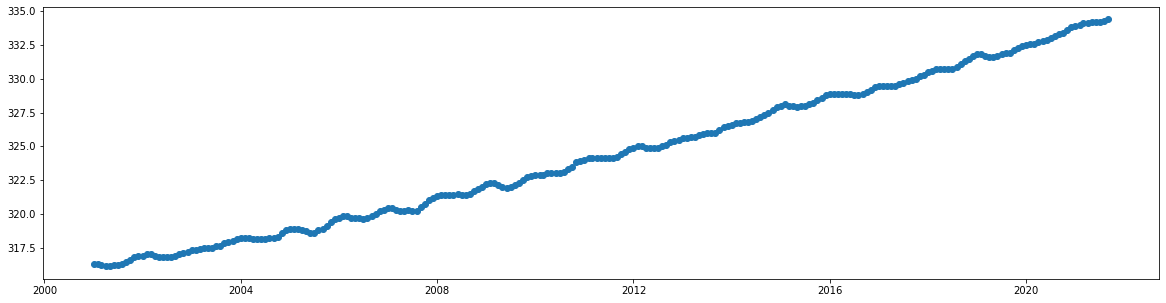

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(20,5),sharex=False)

ax.scatter(data_mensual.index,data_mensual["N2O"])